In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [22]:
data = pd.read_csv('University_of_Alaska_Courses_2016-2020.csv')
data

,Department,Course Catalogue Number,Course Number,Description,Graduate/Undergraduate,Lab,Year,Keywords
0,Agriculture (AGRI),b'A138',b'AGRI\xc2\xa0A138 Organic Gardening',b'\nIntroduces organic methods and materials f...,NaN,NaN,2019-2020,"['agri', ' compost', 'crop', 'garden', 'harves..."
1,Alaska Native Studies (AKNS),b'A181',b'AKNS\xc2\xa0A181 Community Project Planning',b'\nIntroduces the process of community planni...,NaN,NaN,2019-2020,[' rural ']
2,Alaska Native Studies (AKNS),b'A182',b'AKNS\xc2\xa0A182 Grant Writing for Alaska Na...,b'\nIntroduces grant writing focused on commun...,NaN,NaN,2019-2020,[' rural ']
3,Alaska Native Studies (AKNS),b'A185',b'AKNS\xc2\xa0A185 Event Planning and Meeting ...,b'\nProvides an overview of event coordination...,NaN,NaN,2019-2020,[' rural ']
4,Alaska Native Studies (AKNS),b'A190',b'AKNS\xc2\xa0A190 Selected Topics: Alaska Nat...,b'\nFocuses on an applied traditional Alaska N...,NaN,NaN,2019-2020,[' culinary ']
...,...,...,...,...,...,...,...,...
2390,Veterinary Technology (VTCH),b'A112L',b'VTCH\xc2\xa0A112L Veterinary Anatomy and Phy...,b'\nApplies a hands-on approach to learning th...,NaN,NaN,2016-2017,[' animal']
2391,Veterinary Technology (VTCH),b'A113',b'VTCH\xc2\xa0A113 Veterinary Nursing Skills',b'\nIntroduces personal safety and techniques ...,NaN,NaN,2016-2017,[' animal']
2392,Veterinary Technology (VTCH),b'A113L',b'VTCH\xc2\xa0A113L Veterinary Nursing Skills ...,b'\nApplies personal safety and techniques for...,NaN,NaN,2016-2017,[' animal']
2393,Veterinary Technology (VTCH),b'A121',b'VTCH\xc2\xa0A121 Small Animal Medicine',b'\nIntroduces the topics of small animal heal...,NaN,NaN,2016-2017,"[' animal', ' nutri']"


In [23]:
data['Keywords'] = data['Keywords'].apply(lambda x: x[1:-1].split(', '))
clean_data = data.explode('Keywords')

In [24]:
# frequency of top 50 keywords
frequency_top50 = clean_data['Keywords'].value_counts().to_frame().head(50)
frequency_top50.head()

,Keywords
'land',444
' nutri',380
'food',236
' diet',228
' animal',201


In [25]:
# frequency of top 50 keywords in each department
by_department = clean_data[clean_data['Keywords'].isin(frequency_top50.index)].groupby(['Department','Keywords']).count()
frequency_in_department = by_department.loc[:,['Course Catalogue Number']].rename(columns={'Course Catalogue Number':'Count'})
frequency_in_department.head()

Count
Department         Keywords        
Agriculture (AGRI) ' soil'        8
                   'agri'        16
                   'crop'         8
                   'harvest'      8
                   'land'         4

In [26]:
# top keyword in each department
by_department_fullkeywords = clean_data.groupby(['Department','Keywords']).count().loc[:,['Course Catalogue Number']].rename(columns={'Course Catalogue Number':'Count'})
by_department_fullkeywords_reset = by_department_fullkeywords.reset_index()
top_word_in_dept = by_department_fullkeywords_reset.sort_values('Count').groupby('Department').last()

In [27]:
#distribution of top 10 
top3_department = by_department_fullkeywords_reset.groupby('Department').sum().sort_values('Count',ascending=False).head(3)
top3_department

,Count
Department,
Dietetics Nutrition (DN),632
Culinary Arts (CA),440
Biology (BIOL),266


In [28]:
with pd.ExcelWriter('University_of_Alaska_EDA.xlsx') as writer:
    frequency_top50.to_excel(writer, sheet_name='Top 50 keywords')
    frequency_in_department.to_excel(writer, sheet_name='Frequency for each Department')
    top_word_in_dept.to_excel(writer, sheet_name='Top keyword in Department')
    top3_department.to_excel(writer, sheet_name='Top 3 Departments')

In [29]:
top3_dept_name = top3_department.index
top3_dept_name

Index(['Dietetics Nutrition (DN)', 'Culinary Arts (CA)', 'Biology (BIOL)'], dtype='object', name='Department')

Text(0.5, 1.0, 'Dietetics Nutrition (DN)')

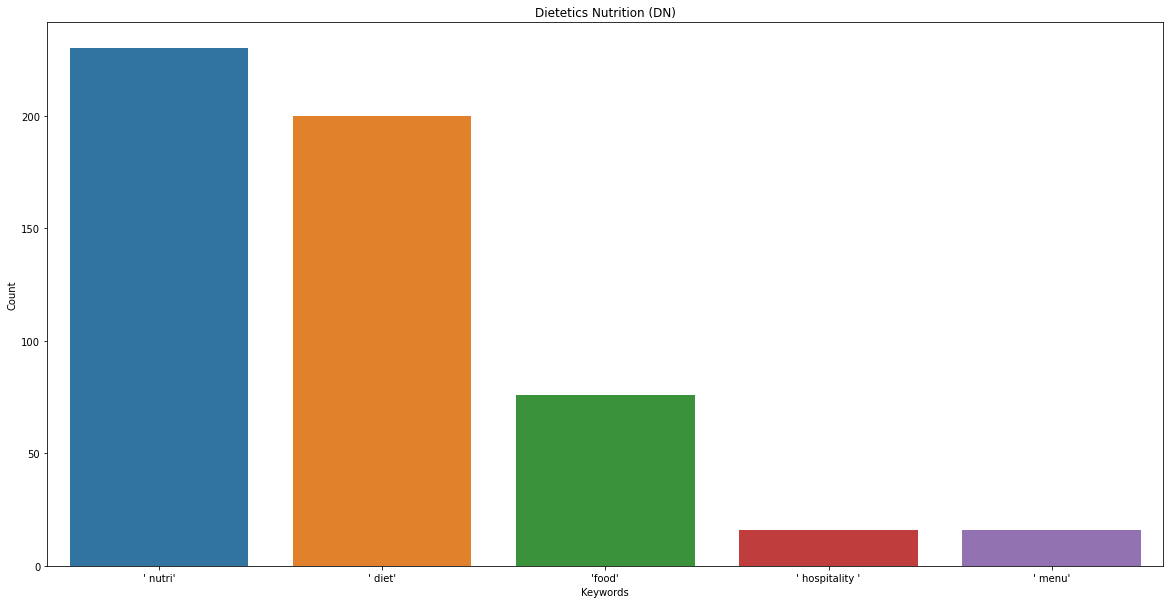

In [18]:
# ANSI
plt.figure(figsize=(20,10))
ANSI = by_department_fullkeywords_reset[by_department_fullkeywords_reset['Department']==top3_dept_name[0]].sort_values('Count',ascending=False).head(5)
sns.barplot(x='Keywords',y='Count' ,data=ANSI)
plt.title(top3_dept_name[0])

Text(0.5, 1.0, 'Culinary Arts (CA)')

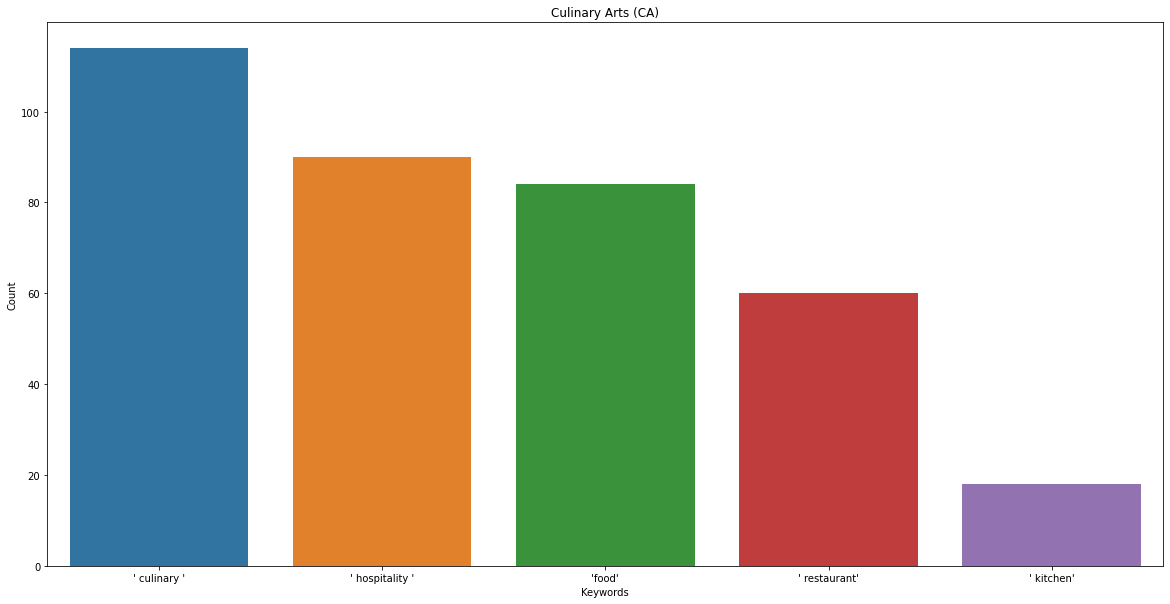

In [19]:
# NSCI
plt.figure(figsize=(20,10))
ANSI = by_department_fullkeywords_reset[by_department_fullkeywords_reset['Department']==top3_dept_name[1]].sort_values('Count',ascending=False).head(5)
sns.barplot(x='Keywords',y='Count' ,data=ANSI)
plt.title(top3_dept_name[1])

Text(0.5, 1.0, 'Biology (BIOL)')

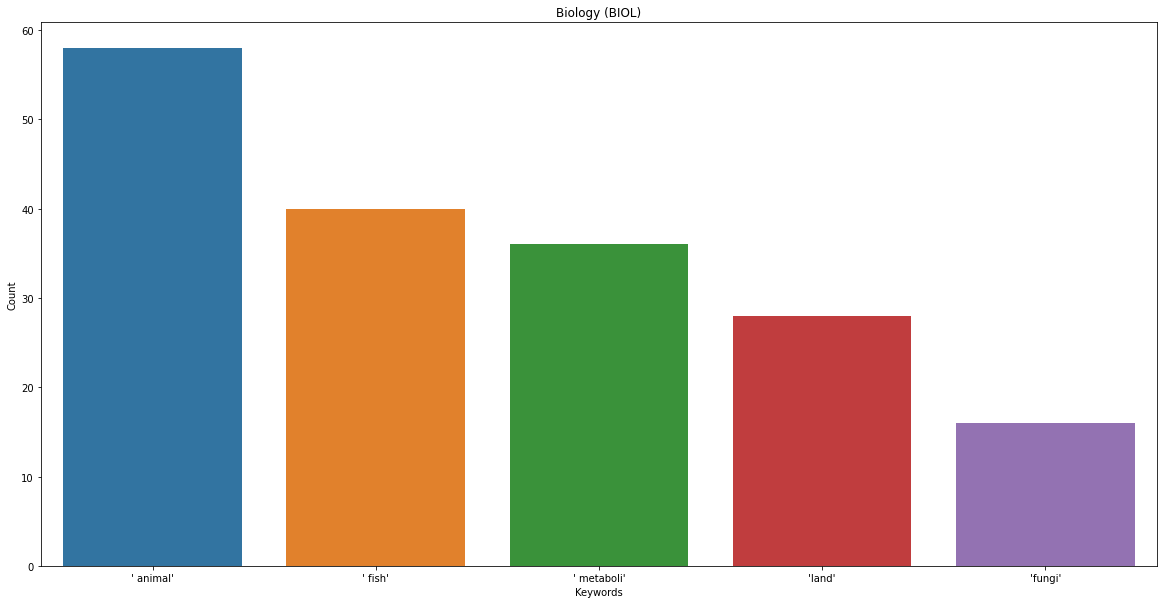

In [20]:

# NREM
plt.figure(figsize=(20,10))
ANSI = by_department_fullkeywords_reset[by_department_fullkeywords_reset['Department']==top3_dept_name[2]].sort_values('Count',ascending=False).head(5)
sns.barplot(x='Keywords',y='Count' ,data=ANSI)
plt.title(top3_dept_name[2])